****E-Commerce & Retail B2B Classification Case Study****

***Problem Statement***

Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.

***Goal***

Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).
Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.
It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.

**Data Understanding**

RECEIPT_METHOD	In which method payments have been made

CUSTOMER_NAME	Name of the customer/vendor

CUSTOMER_NUMBER	Customer's unique identity number

RECEIPT_DOC_NO	Reference number of the payment receipt

RECEIPT_DATE	The date in which the payment has been made

CLASS	As the payment against these invoices have already been received so Transaction Class as PMT (short for Payment) assigned

CURRENCY_CODE	Currency used for the payment

Local Amount	Invoice value in local currency

USD Amount	Invoice Value converted to USD

INVOICE_ALLOCATED	Invoice number that has been allocated to a particular vendor

INVOICE_CREATION_DATE	The date on which the invoice was created

DUE_DATE	The date by which the payment was to be made

PAYMENT_TERM	Days given to the vendor/customer for making the payments

INVOICE_CLASS	Three types of Invoice classes - Credit Memo or Credit Note (CM), Debit Memo or Debit Note (DM) or Invoice (INV)

INVOICE_CURRENCY_CODE	Currency code as per the invoice generated

INVOICE_TYPE	Invoice created for physical goods or services (non-goods)

Finally target variable will be derived based on the suggested information "You need to derive it by checking whether the payment receipt date falls within, or after the due date. By doing so, you can create your binary target variable as 1 or 0."

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [2]:
# Importing Received dataset and looking at the first 5 records
train = pd.read_excel("G:/M/Domain Oriented Case Study/E-Commerce & Retail B2B Case Study/Received_Payments_Data.xlsx")
train.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,AS_OF_DATE,Customer Type
0,WIRE,C EA Corp,37403,1.421000e+10,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,2022-04-04 01:07:00,3rd Party
1,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,2022-04-04 01:07:00,Related Party
2,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,2022-04-04 01:07:00,Related Party
3,WIRE,FARO Corp,1409,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,2022-04-04 01:07:00,Related Party
4,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,2022-04-04 01:07:00,Related Party


**Summary Statistics and EDA on train data**

In [5]:
##min, max and average value of invoice value in USD
print('minimum invoice value: ',train['USD Amount'].min())
print('maximum invoice value: ',train['USD Amount'].max())
print('average invoice value: ',np.round(train['USD Amount'].mean(),1))

minimum invoice value:  0.0
maximum invoice value:  10849828.8
average invoice value:  531201.3


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train[['INVOICE_CREATION_DATE','DUE_DATE', 'AS_OF_DATE']] = train[['INVOICE_CREATION_DATE','DUE_DATE', 'AS_OF_DATE']].apply(pd.to_datetime)

In [5]:
#0: Delayed
#1: On time
#creating the target variable
train['target'] = np.where(train['INVOICE_CREATION_DATE']>train['DUE_DATE'], 0, 1)

In [6]:
#counts of unique values
train['target'].value_counts()

1    90263
0     3674
Name: target, dtype: int64

In [28]:
#average invoice value for delayed customers
print('Average Invoice value for delayed customers: ',np.round(train[train['target']==0]['USD Amount'].mean(),2))

Average Invoice value for delayed customers:  248782.34


In [7]:
#checking the basic information about the columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DOC_NO         93908 non-null  float64       
 4   RECEIPT_DATE           93937 non-null  datetime64[ns]
 5   CLASS                  93937 non-null  object        
 6   CURRENCY_CODE          93937 non-null  object        
 7   Local Amount           93937 non-null  float64       
 8   USD Amount             93937 non-null  float64       
 9   INVOICE_ALLOCATED      93937 non-null  object        
 10  INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 11  DUE_DATE               93937 non-null  datetime64[ns]
 12  PAYMENT_TERM           93937 non-null  object        
 13  I

<AxesSubplot:ylabel='Frequency'>

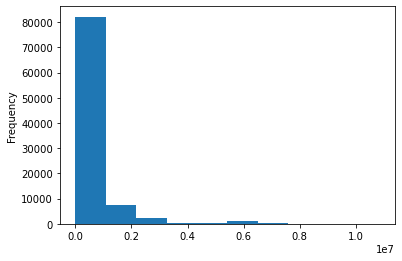

In [11]:
#Plotting the distribution of invoice value
train['USD Amount'].plot.hist()

In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='target', ylabel='count'>

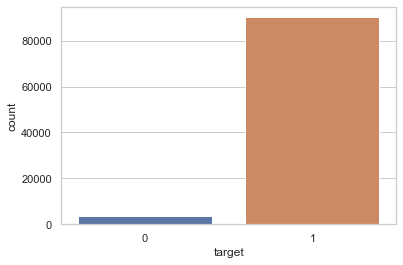

In [13]:
sns.countplot(x=train["target"])

In [14]:
c = train.target.value_counts()
p = np.round(train.target.value_counts(normalize=True)*100,2)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
1,90263,96.09
0,3674,3.91


Here we can see, approximately 4% of the customers are marked as 'Delayed'
Clearly class imbalance is the isuue and we will deal it in the model building process

<AxesSubplot:xlabel='CLASS', ylabel='count'>

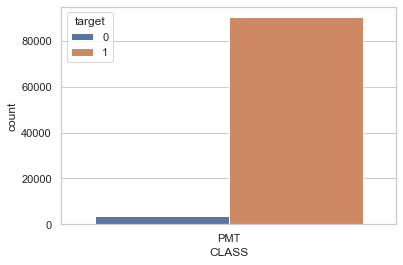

In [15]:
#delayed and on-time customer unique value counts with the payment class
sns.countplot(data=train, x="CLASS", hue="target")

In [21]:
#unique value counts of payment terms
train['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                                      19870
30 Days from Inv Date                                      14672
60 Days from EOM                                           12518
30 Days from EOM                                           11306
15 Days from EOM                                            7544
Immediate Payment                                           5474
Immediate                                                   5261
90 Days from EOM                                            3893
45 Days from Inv Date                                       3550
45 Days from EOM                                            3509
90 Days from Inv Date                                       2211
100% Adv Payment                                            1241
25 DAYS FROM EOM                                             462
Cash on Delivery                                             418
15 Days from Inv Date                                        356
45 DAYS + EOM            

In [22]:
#unique value count distribution of invoice class
train['INVOICE_CLASS'].value_counts()

INV    88124
CM      5261
DM       552
Name: INVOICE_CLASS, dtype: int64

In [23]:
#unique value count distribution of invoice type
train['INVOICE_TYPE'].value_counts()

Goods        66715
Non Goods    27222
Name: INVOICE_TYPE, dtype: int64

<AxesSubplot:xlabel='INVOICE_CLASS', ylabel='count'>

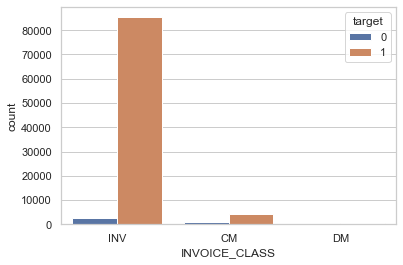

In [16]:
#delayed and on-time customer distribution across the invoice class categories
sns.countplot(data=train, x='INVOICE_CLASS', hue="target")

<AxesSubplot:xlabel='INVOICE_TYPE', ylabel='count'>

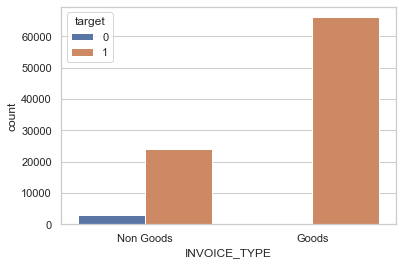

In [17]:
#delayed and on-time customer distribution across the invoice type categories
sns.countplot(data=train, x='INVOICE_TYPE', hue="target")

<AxesSubplot:xlabel='INVOICE_TYPE', ylabel='USD Amount'>

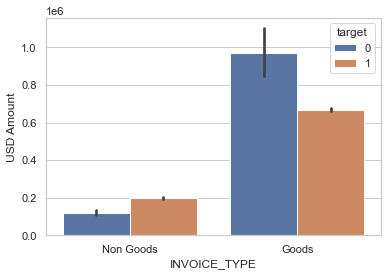

In [18]:
#Multivariate analysis
sns.barplot(data=train, x="INVOICE_TYPE", y="USD Amount", hue="target")

invoice amount showing pretty high for delayed payment customers in Goods invoice type

<AxesSubplot:xlabel='INVOICE_CLASS', ylabel='USD Amount'>

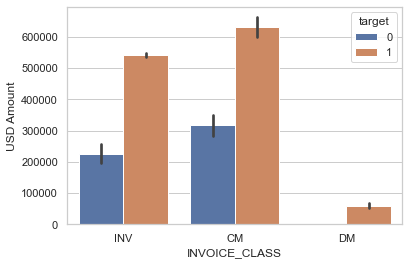

In [19]:
#Multivariate analysis
sns.barplot(data=train, x="INVOICE_CLASS", y="USD Amount", hue="target")

credit card payment mode accounts highest invoice amount across all the invoice classes for on-time customers 

<AxesSubplot:ylabel='Frequency'>

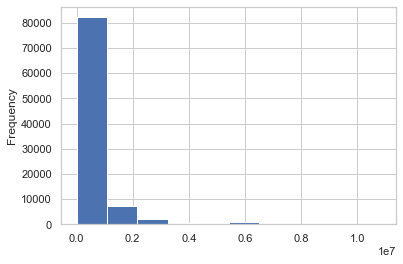

In [35]:
#distribution of the invoice amount(USD)
train['USD Amount'].plot(kind='hist')

In [9]:
#variable transformation
#method: cube root 
train['cbrt_USD_Amount'] = np.cbrt(train['USD Amount'])

<AxesSubplot:ylabel='Frequency'>

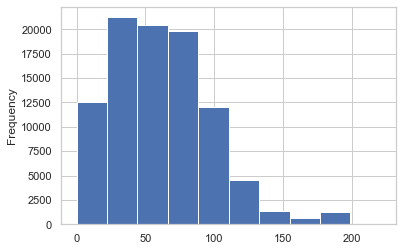

In [9]:
train['cbrt_USD_Amount'].plot(kind='hist')

In [10]:
#The age is calculated in days by taking the difference between Transaction Date and Due Date
train['age']=(train['INVOICE_CREATION_DATE']-train['DUE_DATE']).dt.days

In [11]:
train[train['target']==1].sample(5)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,...,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,AS_OF_DATE,Customer Type,target,cbrt_USD_Amount,age
82565,CHEQUE,BIN Corp,34918,1.970000e+11,2021-06-20,PMT,SAR,135412.04,36102.66371,197200000000,...,2021-03-30,90 Days from EOM,DM,SAR,Non Goods,2022-04-04 01:07:00,3rd Party,1,33.050630,-86
77873,WIRE,FARO Corp,1409,1.890000e+11,2021-04-01,PMT,USD,150538.17,150538.17000,189210000000,...,2021-04-15,60 Days from Inv Date,INV,SAR,Goods,2022-04-04 01:07:00,Related Party,1,53.196396,-59
33271,WIRE,PUIG Corp,33682,1.490000e+11,2021-05-10,PMT,USD,2192.53,2192.53000,149210000000,...,2021-05-07,30 Days from Inv Date,INV,USD,Non Goods,2022-04-04 01:07:00,3rd Party,1,12.991177,-29
63525,WIRE,L OR Corp,29420,1.590000e+11,2021-02-28,PMT,AED,531300.00,144669.84340,159200000000,...,2021-01-30,60 Days from EOM,INV,AED,Non Goods,2022-04-04 01:07:00,Related Party,1,52.495975,-61
16563,WIRE,SEPH Corp,15768,1.280000e+11,2021-01-27,PMT,SAR,3034583.32,809060.56140,128200000000,...,2021-01-07,60 Days from Inv Date,INV,SAR,Goods,2022-04-04 01:07:00,Related Party,1,93.180924,-60


**Clustering - Customer Segmentation**

**Recommendation Given:** Customer-level attributes could also be important independent variables to be included in the model.
A customer-level attribute can be determined via customer segmentation. You have to segment your customers based on
two derived variables: the average payment time in days for a customer and the standard deviation for the payment time.
Using clustering techniques would result in a few distinct clusters of customers, which can be used as an input variable
for the ML model.

In [197]:
clustering_data = train[['Customer Type','target','Local Amount','age','INVOICE_CLASS','INVOICE_CREATION_DATE']]

In [198]:
clustering_data = clustering_data.applymap(lambda s: s.lower() if type(s) == str else s)

In [199]:
clustering_data.columns= clustering_data.columns.str.lower()

In [200]:
clustering_data['std'] = clustering_data[['age','local amount']].std(axis=1)

In [201]:
clustering_data['target'] = clustering_data['target'].astype(str)

In [202]:
clustering_data = clustering_data.loc[clustering_data['age']<=1200]

In [203]:
median = clustering_data["age"].median()
clustering_data["age"] = np.where(clustering_data["age"] >400, median,clustering_data['age'])

In [136]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [139]:
# populate list of numerical and categorical variables
num_list = []
cat_list = []

for column in clustering_data:
    if is_numeric_dtype(clustering_data[column]):
        num_list.append(column)
    elif is_string_dtype(clustering_data[column]):
        cat_list.append(column)
        

print("numeric:", num_list)
print("categorical:", cat_list)

numeric: ['local amount', 'age']
categorical: ['customer type', 'target', 'invoice_class']


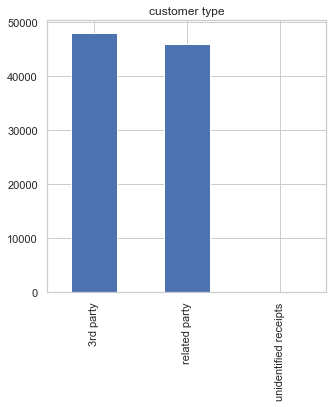

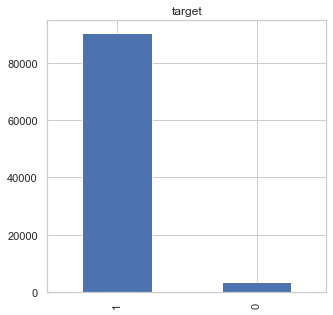

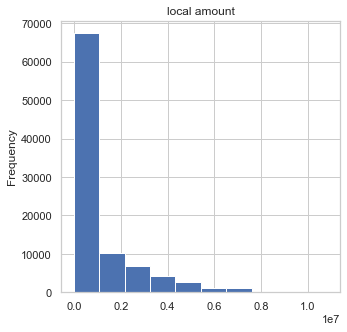

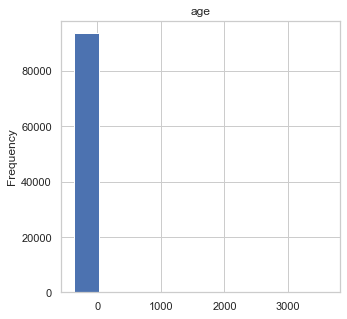

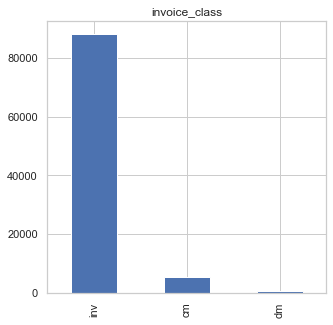

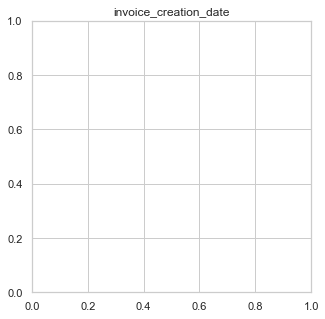

In [141]:
for column in clustering_data:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(clustering_data[column]):
        clustering_data[column].plot(kind = 'hist')
    elif is_string_dtype(clustering_data[column]):
        # show only the TOP 10 value count in each categorical data
        clustering_data[column].value_counts()[:10].plot(kind = 'bar')

In [143]:
# encoding categorical variable
from sklearn.preprocessing import LabelEncoder

clustering_data['customer type'] = LabelEncoder().fit_transform(clustering_data["customer type"])
clustering_data['invoice_class'] = LabelEncoder().fit_transform(clustering_data["invoice_class"])


In [142]:
clustering_data.columns

Index(['customer type', 'target', 'local amount', 'age', 'invoice_class',
       'invoice_creation_date'],
      dtype='object')

In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


def data_scaler(scaler, var):
    scaled_var = "scaled_" + var
    model = scaler.fit(df[var].values.reshape(-1,1))
    df[scaled_var] = model.transform(df[var].values.reshape(-1, 1))
    
    plt.figure(figsize = (5,5))
    plt.title(scaled_var)
    df[scaled_var].plot(kind = 'hist')
    
    plt.figure(figsize = (5,5))
    plt.title(var)
    df[var].plot(kind = 'hist')

In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for var in ["age", "local amount"]:
    scaled_var = "scaled_" + var
    model = scaler.fit(clustering_data[var].values.reshape(-1,1))
    clustering_data[scaled_var] = model.transform(clustering_data[var].values.reshape(-1, 1))

<AxesSubplot:title={'center':'scaled_age'}, ylabel='Frequency'>

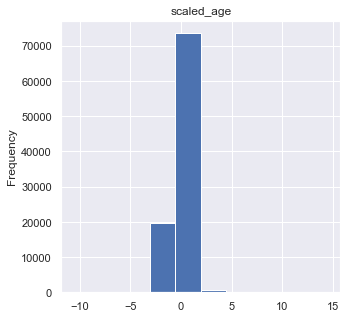

In [216]:
plt.figure(figsize = (5,5))
plt.title('scaled_age')
clustering_data['scaled_age'].plot(kind = 'hist')

<AxesSubplot:title={'center':'scaled_local amount'}, ylabel='Frequency'>

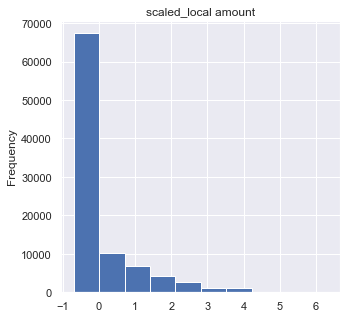

In [217]:
plt.figure(figsize = (5,5))
plt.title('scaled_local amount')
clustering_data['scaled_local amount'].plot(kind = 'hist')

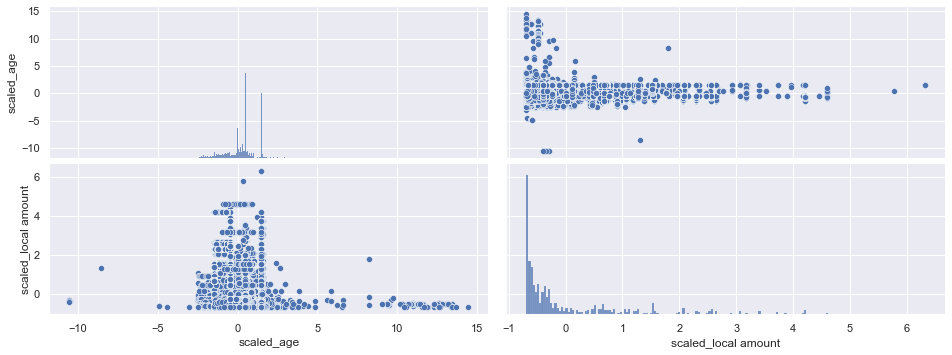

In [218]:
import seaborn as sns
columns = ['scaled_age','scaled_local amount']
#plt.figure(figsize = (10,20))
g = sns.pairplot(clustering_data[columns])
g.fig.set_size_inches(15,5)

In [158]:
# Load packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

In [204]:
X = np.array(clustering_data.loc[:,['std',                # Choose the variable names
                       'age']])    \
                        .reshape(-1, 2)

In [205]:
# Determine optimal cluster number with elbow method
wcss = []

In [206]:
for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)

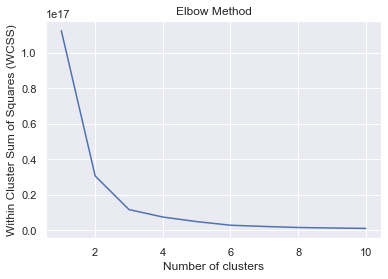

In [207]:
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [208]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)

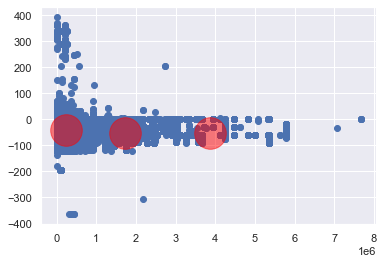

In [213]:
# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=1000,                             # Set centroid size
            c='red',
           alpha=0.5)                           # Set centroid color
plt.show()

We can see that average days of the payment time are segmented in three main zones: 0-1 standard deviation of payment time, 2 standard deviation of payment time and 4 standard deviation of payment time

**Data Preparation**

In [12]:
#dropping the date columns as the necessary information has been derived before
train = train.drop(['RECEIPT_DATE','AS_OF_DATE','DUE_DATE','INVOICE_CREATION_DATE'],axis=1)

In [13]:
train.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Customer Type,target,cbrt_USD_Amount,age
0,WIRE,C EA Corp,37403,1.421000e+10,PMT,USD,370990.92,101018.63040,14200000001,30 Days from EOM,INV,AED,Non Goods,3rd Party,1,46.572958,-58
1,WIRE,RADW Corp,4003,9.921000e+10,PMT,SAR,183750.00,48990.21133,99200000043,30 Days from Inv Date,INV,SAR,Non Goods,Related Party,1,36.590620,-30
2,WIRE,RADW Corp,4003,9.921000e+10,PMT,SAR,157500.00,41991.60971,99210000003,30 Days from Inv Date,INV,SAR,Non Goods,Related Party,1,34.757952,-30
3,WIRE,FARO Corp,1409,9.921000e+10,PMT,SAR,157500.00,41991.60971,99200000038,30 Days from Inv Date,INV,SAR,Non Goods,Related Party,1,34.757952,-30
4,WIRE,RADW Corp,4003,9.921000e+10,PMT,SAR,157500.00,41991.60971,99200000039,30 Days from Inv Date,INV,SAR,Non Goods,Related Party,1,34.757952,-30


In [14]:
#making all lower-case
train = train.applymap(lambda s: s.lower() if type(s) == str else s)

In [15]:
train.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'PAYMENT_TERM', 'INVOICE_CLASS',
       'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'Customer Type', 'target',
       'cbrt_USD_Amount', 'age'],
      dtype='object')

In [16]:
#making the header name lower-case
train.columns= train.columns.str.lower()

In [17]:
train.columns

Index(['receipt_method', 'customer_name', 'customer_number', 'receipt_doc_no',
       'class', 'currency_code', 'local amount', 'usd amount',
       'invoice_allocated', 'payment_term', 'invoice_class',
       'invoice_currency_code', 'invoice_type', 'customer type', 'target',
       'cbrt_usd_amount', 'age'],
      dtype='object')

In [18]:
train.isnull().sum()

receipt_method            0
customer_name             0
customer_number           0
receipt_doc_no           29
class                     0
currency_code             0
local amount              0
usd amount                0
invoice_allocated         0
payment_term              0
invoice_class             0
invoice_currency_code     0
invoice_type              0
customer type             0
target                    0
cbrt_usd_amount           0
age                       0
dtype: int64

In [19]:
numeric_data = train.select_dtypes(include=[np.number])
categorical_data = train.select_dtypes(exclude=[np.number])

In [20]:
#dropping unnecessary numeric columns
numeric_data = numeric_data.drop(['customer_number', 'receipt_doc_no', 'local amount', 'usd amount'],axis=1)

In [21]:
numeric_data.columns

Index(['target', 'cbrt_usd_amount', 'age'], dtype='object')

In [22]:
numeric_data.isnull().sum()

target             0
cbrt_usd_amount    0
age                0
dtype: int64

In [23]:
categorical_data.columns

Index(['receipt_method', 'customer_name', 'class', 'currency_code',
       'invoice_allocated', 'payment_term', 'invoice_class',
       'invoice_currency_code', 'invoice_type', 'customer type'],
      dtype='object')

In [24]:
#dropping unnecessary categorical columns
categorical_data = categorical_data.drop(['receipt_method', 'customer_name','invoice_allocated', 'currency_code', 'class'],axis=1)

In [25]:
categorical_data.columns

Index(['payment_term', 'invoice_class', 'invoice_currency_code',
       'invoice_type', 'customer type'],
      dtype='object')

In [26]:
#dummy encoding
encoded_cols = pd.get_dummies(train[categorical_data.columns], drop_first=True)

In [27]:
data = pd.concat([numeric_data,encoded_cols], axis=1)

In [28]:
data.shape

(93937, 58)

In [35]:
data.sample(5)

,target,cbrt_usd_amount,age,payment_term_120 days from eom,payment_term_120 days from inv date,payment_term_15 days from eom,payment_term_15 days from inv date,payment_term_180 days from inv date,payment_term_195 days from invoice date,payment_term_25 days from eom,...,invoice_currency_code_gbp,invoice_currency_code_jod,invoice_currency_code_kwd,invoice_currency_code_qar,invoice_currency_code_sar,invoice_currency_code_usd,invoice_currency_code_zar,invoice_type_non goods,customer type_related party,customer type_unidentified receipts
92245,1,74.595393,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
80082,1,18.857031,-45,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
84411,1,97.254913,-60,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
27389,1,81.932127,-30,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23754,1,128.091026,-78,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
data.shape

(93937, 58)

**train-test split**

In [36]:
from sklearn.model_selection import train_test_split
X = data.drop(['target'],axis=1)
y = data[['target']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
#apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
num_vars = ['cbrt_usd_amount','age']

In [40]:
data[num_vars] = scaler.fit_transform(data[num_vars])

In [41]:
scaler.fit(X_train[['cbrt_usd_amount','age']])
X_train[['cbrt_usd_amount','age']] = scaler.transform(X_train[['cbrt_usd_amount','age']])

In [42]:
X_test[['cbrt_usd_amount','age']] = scaler.transform(X_test[['cbrt_usd_amount','age']])

**model building**

In [33]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65700
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 22 Jan 2023   Deviance:                   1.6026e+05
Time:                        00:05:53   Pearson chi2:                 7.84e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                 1.964e+15   1.62e+06   1.22e+09      0.000    1.96e+15    1.96e+15
cbrt_usd_amount                                                       4.924e+13   3.09e+05   1.59e+08      0.000    4.92e+13    4.92e+13
age                                                                  -1.478e+15   3.03e+05  -4.87e+09      0.000   -1.48e+15   -1.48e+15
payment_term_120 days from eom                                       -3.202e+15   6.72e+07  -4.77e+07      0.000    -3.2e+15    -3.2e+15
payment_term_120 days from inv date                                  -1.451e+14   7.67e+06  -1.89e+07      0.000   -1.45e+14   -1.45e+14
payment_term_15 days from eom                                        -2.092e+14   2.55e+06  -8.22e+07      0.000   -2.09e+14   -2.09e+14
payment_term_15 days from inv date                                    2.697e+15   4.85e+06   5.57e+08      0.000     2.7e+15     2.7e+15
payment_term_180 days from inv date                                      5.0967   3.03e-07   1.68e+07      0.000       5.097       5.097
payment_term_195 days from invoice date                              -9.918e+14   9.06e+06  -1.09e+08      0.000   -9.92e+14   -9.92e+14
payment_term_25 days from eom                                         2.744e+15   4.43e+06    6.2e+08      0.000    2.74e+15    2.74e+15
payment_term_25% advance, 75% 30 days from invoice date                2.09e+15   3.36e+07   6.21e+07      0.000    2.09e+15    2.09e+15
payment_term_30 days from eom                                         2.414e+15   2.47e+06   9.78e+08      0.000    2.41e+15    2.41e+15
payment_term_30 days from inv date                                    2.774e+15   2.41e+06   1.15e+09      0.000    2.77e+15    2.77e+15
payment_term_30% advance 70% after 30 days from invoice date          2.391e+15   3.37e+07    7.1e+07      0.000    2.39e+15    2.39e+15
payment_term_30% advance 70% after 60 days from invoice date          1.344e+15   2.39e+07   5.63e+07      0.000    1.34e+15    1.34e+15
payment_term_365 days from invoice date                              -5.915e+15   3.37e+07  -1.76e+08      0.000   -5.91e+15   -5.91e+15
payment_term_40 days from eom                                         2.418e+15   6.72e+07    3.6e+07      0.000    2.42e+15    2.42e+15
payment_term_45 days + eom                                            2.173e+15      5e+06   4.34e+08      0.000    2.17e+15    2.17e+15
payment_term_45 days from eom                                         2.121e+15   2.73e+06   7.76e+08      0.000    2.12e+15    2.12e+15
payment_term_45 days from inv date                                   

In [48]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [35]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Use score method to get accuracy of model
prediction = logisticRegr.predict(X_train)
test_score = logisticRegr.score(X_test, y_test)
test_score

0.9885032999787098

In [37]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)

X_train shape:  (65755, 57)
X_test shape:  (28182, 57)


In [38]:
train_pred = logisticRegr.predict(X_train)
y_pred = logisticRegr.predict(X_test)

In [39]:
from sklearn import metrics
train_score = metrics.accuracy_score(y_train, train_pred)
test_score = metrics.accuracy_score(y_test, y_pred)
print("train score", train_score)
print("test score", test_score)

train score 0.9888981826477073
test score 0.9885032999787098


<Figure size 720x360 with 0 Axes>

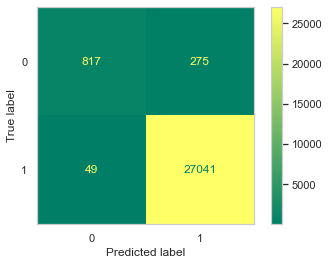

In [40]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#conf_mat = confusion_matrix(y_test, y_pred)
#class_names=[0,1]
#print(conf_mat)
#plt.figure(figsize=(10,5))

#plt.grid(False)
plt.figure(figsize=(10,5))
plot_confusion_matrix(logisticRegr, X_test, y_test, cmap="summer",
                                colorbar=True)  
plt.grid(False)
plt.show()

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = logisticRegr.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = logisticRegr.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :\n\n",cm)
print("\n")
# ROC- AUC score
print("ROC-AUC score  test dataset:  \t", metrics.roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  ", metrics.precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  \t", metrics.recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  \t", metrics.f1_score(y_test,y_pred_test))

confusion Matrix is :

 [[  817   275]
 [   49 27041]]


ROC-AUC score  test dataset:  	 0.9936543092689271
precision score  test dataset:   0.9899326402108655
Recall score  test dataset:  	 0.9981912144702842
f1 score  test dataset :  	 0.9940447744734037


Challenges related to imbalanced dataset
1. Biased predictions
2. Misleading accuracy

We will check with two efficient techniques: ADASYN and SMOTE+TOMEK

**Dealing with class imbalance techniques**

In [45]:
#ADASYN
from collections import Counter
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

126398

In [46]:
print(sorted(Counter(y_resampled_ada).items()))

[('target', 1)]


In [49]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [51]:
from sklearn import metrics 
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', metrics.f1_score(y_test, y_pred_ada))
print ('Recall: ', metrics.recall_score(y_test, y_pred_ada))
print ('Precision: ', metrics.precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', metrics.classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',metrics.confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.9305939961677666
F1 score:  0.9625473901887948
Recall:  0.9278331487633813
Precision:  0.9999602164226608

 clasification report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53      1092
           1       1.00      0.93      0.96     27090

    accuracy                           0.93     28182
   macro avg       0.68      0.96      0.74     28182
weighted avg       0.98      0.93      0.95     28182


 confussion matrix:
 [[ 1091     1]
 [ 1955 25135]]


ADASYN is an automatic first choice to handle the class imbalance problem as it's an extension of SMOTE where the minority examples are generated based on their density distribution.
More synthetic data are generated from minority class samples that are harder to learn as compared with those minority samples that are easier to learn.

SMOTE+TOMEK Combining Oversampling and Undersampling

1. Tomek links can be used as an under-sampling method or as a data cleaning method.
2. Tomek links to the over-sampled training set as a data cleaning method. Thus, instead of removing only the majority class examples that from Tomek links, examples from both classes are removed.

In [52]:
#SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

126328

In [53]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[('target', 1)]


In [54]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [56]:
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', metrics.f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', metrics.recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', metrics.precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', metrics.classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',metrics.confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.962884110425094
F1 score:  0.980322070885695
Recall:  0.9617940199335548
Precision:  0.9995779943221055

 clasification report:
               precision    recall  f1-score   support

           0       0.51      0.99      0.67      1092
           1       1.00      0.96      0.98     27090

    accuracy                           0.96     28182
   macro avg       0.76      0.98      0.83     28182
weighted avg       0.98      0.96      0.97     28182


 confussion matrix:
 [[ 1081    11]
 [ 1035 26055]]


So, we will finalize the SMOTE+TOMEK model as it's giving the better result across all the metrics

In [42]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [43]:
#train and test set prediction
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set accuracy: 1.0
Test set accuracy: 1.0


In [44]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp.nlargest(20)

age                                   0.737225
payment_term_immediate payment        0.107642
cbrt_usd_amount                       0.044403
invoice_type_non goods                0.039541
invoice_currency_code_sar             0.023057
invoice_currency_code_usd             0.009248
payment_term_immediate                0.009229
invoice_class_inv                     0.007496
customer type_related party           0.005183
payment_term_30 days from eom         0.004558
payment_term_30 days from inv date    0.002256
payment_term_60 days from inv date    0.002241
payment_term_cash on delivery         0.001431
invoice_currency_code_eur             0.001295
payment_term_60 days from eom         0.001202
invoice_class_dm                      0.000863
invoice_currency_code_bhd             0.000596
payment_term_15 days from eom         0.000493
invoice_currency_code_kwd             0.000442
payment_term_90 days from eom         0.000281
dtype: float64

Top 20 features as per the feature-importance of Random Forest model

In [77]:
#Feature Importance using Recursive Feature Elimination
from sklearn.feature_selection import RFE
predictors = X_resampled_smt_tmk
selector = RFE(lreg_smt_tmk, n_features_to_select=10)
selector = selector.fit(predictors, y_resampled_smt_tmk)

In [78]:
print(selector.support_)
print(selector.ranking_)

[False  True False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False  True False
 False False False False  True  True False False False False  True  True
 False  True  True False False False  True False False]
[19  1 46 38  7 22 48 43 23 34  9  5 30 37 45 44 25 17 15 26 28  1 42 20
 16 40 31 32 33 10 29 18 13  2  1  4  8 27 35 41  1  1 36 21  6 14  1  1
  3  1  1 24 11 47  1 12 39]


In [63]:
order = selector.ranking_
order

array([28,  1, 55, 47, 16, 31, 57, 52, 32, 43, 18, 14, 39, 46, 54, 53, 34,
       26, 24, 35, 37,  8, 51, 29, 25, 49, 40, 41, 42, 19, 38, 27, 22, 11,
        7, 13, 17, 36, 44, 50,  5,  4, 45, 30, 15, 23,  3,  2, 12,  9, 10,
       33, 20, 56,  6, 21, 48])

In [79]:
X_resampled_smt_tmk.columns[selector.support_]

Index(['age',
       'payment_term_50% advance payment and 50% upon receiving the shipment',
       'payment_term_eom', 'payment_term_lcsight',
       'payment_term_on consignment', 'invoice_currency_code_eur',
       'invoice_currency_code_gbp', 'invoice_currency_code_kwd',
       'invoice_currency_code_qar', 'invoice_type_non goods'],
      dtype='object')

**Finalize the model**

In [84]:
X = data[['age',
       'payment_term_50% advance payment and 50% upon receiving the shipment',
       'payment_term_eom', 'payment_term_lcsight',
       'payment_term_on consignment', 'invoice_currency_code_eur',
       'invoice_currency_code_gbp', 'invoice_currency_code_kwd',
       'invoice_currency_code_qar', 'invoice_type_non goods']]
y = data[['target']]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [87]:
num_vars = ['age']

In [88]:
data[num_vars] = scaler.fit_transform(data[num_vars])

In [89]:
scaler.fit(X_train[['age']])
X_train[['age']] = scaler.transform(X_train[['age']])

In [90]:
X_test[['age']] = scaler.transform(X_test[['age']])

In [91]:
#SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

126346

In [92]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [93]:
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', metrics.f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', metrics.recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', metrics.precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', metrics.classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',metrics.confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.9778936910084451
F1 score:  0.9883692709791841
Recall:  0.9771502399409376
Precision:  0.9998489140698772

 clasification report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1092
           1       1.00      0.98      0.99     27090

    accuracy                           0.98     28182
   macro avg       0.82      0.99      0.88     28182
weighted avg       0.99      0.98      0.98     28182


 confussion matrix:
 [[ 1088     4]
 [  619 26471]]


So, we can observe that all score of the metrics got improved in this finalized model

**Unseen Data: Model Evaluation**

In [94]:
# Importing the dataset and looking at the first 6 records
test = pd.read_csv("G:/M/Domain Oriented Case Study/E-Commerce & Retail B2B Case Study/Open_Invoice_data.csv",encoding='latin1')
test.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,INVOICE_TYPE
0,04-04-2022 01:07,3rd Party,GIVE Corp,49144.0,1.00E+11,21-12-2021,Immediate,21-12-2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53,Goods
1,04-04-2022 01:07,Related Party,AL J Corp,23152.0,1.00E+11,01-02-2022,30 Days from Inv Date,03-03-2022,USD,"2,000",INVOICE,33,"2,000",02-01-2022 14:09,Goods
2,04-04-2022 01:07,Related Party,AL J Corp,23152.0,1.00E+11,24-03-2022,30 Days from Inv Date,23-04-2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46,Goods
3,04-04-2022 01:07,Related Party,AL R Corp,23312.0,1.00E+11,04-01-2022,15 Days from Inv Date,19-01-2022,AED,"2,415",INVOICE,76,"2,415",01-05-2022 11:49,Goods
4,04-04-2022 01:07,Related Party,ALLI Corp,7530.0,1.00E+11,03-03-2022,30 Days from EOM,30-04-2022,AED,"3,800",INVOICE,-25,"3,800",03-03-2022 22:30,Goods


In [95]:
df = pd.DataFrame()
df['Customer No.'] = test['Customer Account No'].astype(str)

In [96]:
test = test.drop(['AS_OF_DATE','Transaction Number'],axis=1)

In [97]:
test['invoice creation date'] = np.where(test['INV_CREATION_DATE'].str.contains('/'), pd.to_datetime(test['INV_CREATION_DATE']).dt.strftime('%m/%d/%Y'), pd.to_datetime(test['INV_CREATION_DATE'], dayfirst=True).dt.strftime('%m/%d/%Y'))

In [98]:
test.sample(5)

,Customer Type,Customer_Name,Customer Account No,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,INVOICE_TYPE,invoice creation date
47891,Related Party,ALLI Corp,53540.0,27-01-2022,30 Days from Inv Date,26-02-2022,USD,"17,995",INVOICE,38,"4,900",1/27/2022 14:31,Goods,01/27/2022
50770,3rd Party,WHIT Corp,7557.0,18-02-2022,60 Days from EOM,30-04-2022,KWD,"6,785",INVOICE,-25,"22,232",2/18/2022 20:51,Goods,02/18/2022
62060,Related Party,SEPH Corp,2315.0,25-03-2022,60 Days from EOM,30-05-2022,AED,"7,271",INVOICE,-55,"7,271",3/25/2022 10:03,Goods,03/25/2022
48216,3rd Party,AL J Corp,7504.0,10-03-2022,60 Days from EOM,30-05-2022,KWD,381,INVOICE,-55,"1,249",03-10-2022 09:36,Goods,10/03/2022
9580,3rd Party,PUIG Corp,38034.0,01-05-2021,Immediate Payment,01-05-2021,AED,100,INVOICE,339,27,11/15/2021 8:45,Goods,11/15/2021


In [99]:
test[['invoice creation date','Due Date']] = test[['invoice creation date','Due Date']].apply(pd.to_datetime)

In [100]:
test['target'] = np.where(test['invoice creation date']>test['Due Date'], 0, 1)

In [101]:
test.target.value_counts()

1    64471
0    23733
Name: target, dtype: int64

In [102]:
df['actual'] = test['target']

In [103]:
test.isnull().sum()

Customer Type            0
Customer_Name            0
Customer Account No      3
Transaction Date         0
Payment Term             0
Due Date                 0
Transaction Currency     0
Local Amount             0
Transaction Class        0
AGE                      0
USD Amount               0
INV_CREATION_DATE        0
INVOICE_TYPE             0
invoice creation date    0
target                   0
dtype: int64

In [104]:
test = test.dropna()

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88201 entries, 0 to 88203
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Type          88201 non-null  object        
 1   Customer_Name          88201 non-null  object        
 2   Customer Account No    88201 non-null  float64       
 3   Transaction Date       88201 non-null  object        
 4   Payment Term           88201 non-null  object        
 5   Due Date               88201 non-null  datetime64[ns]
 6   Transaction Currency   88201 non-null  object        
 7   Local Amount           88201 non-null  object        
 8   Transaction Class      88201 non-null  object        
 9   AGE                    88201 non-null  int64         
 10  USD Amount             88201 non-null  object        
 11  INV_CREATION_DATE      88201 non-null  object        
 12  INVOICE_TYPE           88201 non-null  object        
 13  i

In [106]:
test['USD Amount'] = test['USD Amount'].str.replace(',', '').astype(float)

In [107]:
test['USD Amount'].sample(5)

59469     412.0
68383     399.0
35189      85.0
23326    1201.0
54231    1997.0
Name: USD Amount, dtype: float64

In [108]:
test = test.drop(['Customer_Name','Customer Account No','Transaction Date','Due Date','Local Amount','INV_CREATION_DATE','invoice creation date','target'],axis=1)

In [104]:
test.head()

,Customer Type,Payment Term,Transaction Currency,Transaction Class,AGE,USD Amount,INVOICE_TYPE
0,3rd Party,Immediate,AED,CREDIT NOTE,105,-3088.0,Goods
1,Related Party,30 Days from Inv Date,USD,INVOICE,33,2000.0,Goods
2,Related Party,30 Days from Inv Date,USD,INVOICE,-18,2000.0,Goods
3,Related Party,15 Days from Inv Date,AED,INVOICE,76,2415.0,Goods
4,Related Party,30 Days from EOM,AED,INVOICE,-25,3800.0,Goods


In [109]:
test['Transaction Class'] = test['Transaction Class'].map({'CREDIT NOTE': 'CM', 'DEBIT NOTE':'DM', 'INVOICE':'INV', 'PAYMENT':'CM'})

In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88201 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Type         88201 non-null  object 
 1   Payment Term          88201 non-null  object 
 2   Transaction Currency  88201 non-null  object 
 3   Transaction Class     88201 non-null  object 
 4   AGE                   88201 non-null  int64  
 5   USD Amount            88201 non-null  float64
 6   INVOICE_TYPE          88201 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.4+ MB


In [110]:
test = test.applymap(lambda s: s.lower() if type(s) == str else s)

In [111]:
test.columns= test.columns.str.lower()

In [112]:
numeric_data = test.select_dtypes(include=[np.number])
categorical_data = test.select_dtypes(exclude=[np.number])

In [113]:
categorical_data.columns

Index(['customer type', 'payment term', 'transaction currency',
       'transaction class', 'invoice_type'],
      dtype='object')

In [114]:
categorical_data.rename(columns = {'payment term':'payment_term','transaction class':'invoice_class','transaction currency':'invoice_currency_code'}, inplace = True)

In [65]:
categorical_data.columns

Index(['customer type', 'payment_term', 'invoice_currency_code',
       'invoice_class', 'invoice_type'],
      dtype='object')

In [115]:
test.rename(columns = {'payment term':'payment_term','transaction class':'invoice_class','transaction currency':'invoice_currency_code'}, inplace = True)

In [116]:
encoded_cols = pd.get_dummies(test[categorical_data.columns], drop_first=True)

In [117]:
numeric_data.columns

Index(['age', 'usd amount'], dtype='object')

In [118]:
numeric_data.rename(columns = {'usd amount':'cbrt_usd_amount'}, inplace=True)

In [119]:
numeric_data.columns

Index(['age', 'cbrt_usd_amount'], dtype='object')

In [120]:
test_data = pd.concat([numeric_data,encoded_cols], axis=1)

In [121]:
test_data.shape

(88201, 62)

In [122]:
unseen = test_data[['age',
       'payment_term_50% advance payment and 50% upon receiving the shipment',
       'payment_term_eom', 'payment_term_lcsight',
       'payment_term_on consignment', 'invoice_currency_code_eur',
       'invoice_currency_code_gbp', 'invoice_currency_code_kwd',
       'invoice_currency_code_qar', 'invoice_type_non goods']]

In [123]:
X_Predict = lreg_smt_tmk.predict(unseen)

In [124]:
lreg_smt_tmk.intercept_

array([42.46124315])

In [125]:
lreg_smt_tmk.coef_

array([[-61.11088477,   1.49891322,   1.31848232,   2.63295129,
          2.13238477,   3.1916198 ,   4.02305207,   1.60933503,
          1.55885151,  -1.97836516]])

In [126]:
lreg_smt_tmk.predict_proba(unseen)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [127]:
result=pd.DataFrame(data=X_Predict, index=unseen.index, columns=['score'])

In [128]:
result.head(5)

,score
0,0
1,0
2,1
3,0
4,1


In [130]:
result['predicted_probabilities'] = lreg_smt_tmk.predict_proba(unseen)[:,1]

In [131]:
result['is_delayed'] = np.where(result['predicted_probabilities'] >= 0.7,"yes","no")

In [132]:
result['Cust id'] = df['Customer No.']
result['Cust id'] = result['Cust id'].astype('str').str.replace(r".0", r"", regex=False)

In [133]:
result['actual'] = df['actual']

In [134]:
result.rename(columns = {'score':'predicted'}, inplace=True)

In [135]:
expected_result = result[['Cust id','actual','predicted','is_delayed']]

In [136]:
expected_result.sample(10)

,Cust id,actual,predicted,is_delayed
67288,34647,1,1,yes
60971,7530,1,1,yes
53170,7588,1,0,no
39162,45720,0,0,no
15138,2624,1,0,no
20187,20844,1,1,yes
59331,3997,0,1,yes
30267,34876,1,0,no
37858,45720,1,0,no
7244,3927,1,0,no


The above summary table ensures that the probability of late payment is aggregated at a customer level.
For example, we can see for customer id 20187, we predicted that the customer will be delayed with more than 70% probabilities.

In [137]:
expected_result[expected_result['is_delayed']=="yes"]

,Cust id,actual,predicted,is_delayed
2,23152,1,1,yes
4,7530,1,1,yes
5,7530,1,1,yes
6,7530,1,1,yes
7,7530,1,1,yes
...,...,...,...,...
88172,20867,1,1,yes
88186,23136,0,1,yes
88187,23136,1,1,yes
88188,23136,1,1,yes


Finally, we can see that there are 28287 customers out of 88201 unseen records are predicted as delayed customers.

**Top 10 factors / important predictors**

age
payment_term_50% advance payment and 50% upon receiving the shipment
payment_term_eom
payment_term_lcsight
payment_term_on consignment
invoice_currency_code_eur
invoice_currency_code_gbp
invoice_currency_code_kwd
invoice_currency_code_qar
invoice_type_non goods

**Recommendations**

1. We should focus more on the time difference between Due Date and Invoice Payment Date
2. Payment terms: 50% advance payment and 50% upon receiving the shipment, eom, lcsight and on consignment variables need to be considered with greater attention.
3. Where the invoice currency codes are eur, gbp, kwd and qar, the risk is higher of delay payment.
4. Invoice type non-goods has lower impact than Goods invoice type in delayed payment.

***Thank you!!!***